In [1]:
# This file is used to prove that Linear Regression can be used on the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sqlite3

In [2]:
# gets data from fruit database created in Databasing notebook
con = sqlite3.connect('fruits.db')
fruitdf = pd.read_sql_query("SELECT * FROM clean_data", con)
fruitdf


,id,name,carbohydrates,protein,fat,calories,sugar
0,1,Apple,11.40,0.30,0.40,52.0,10.30
1,2,Apricot,3.90,0.50,0.10,15.0,3.20
2,3,Banana,22.00,1.00,0.20,96.0,17.20
3,4,Blackberry,9.00,1.30,0.40,40.0,4.50
4,5,Blueberry,5.50,0.00,0.40,29.0,5.40
5,6,Cherry,12.00,1.00,0.30,50.0,8.00
6,7,Durian,27.10,1.50,5.30,147.0,6.75
7,8,Fig,19.00,0.80,0.30,74.0,16.00
8,9,Gooseberry,10.00,0.90,0.60,44.0,0.00
9,10,Grapes,18.10,0.72,0.16,69.0,15.48


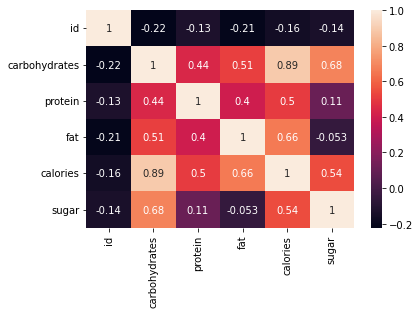

In [3]:
# the heatmap below shows the correlation between the nutrition values
# The correlation between calories and carbohydrates is the highest (0.89) so I'll be exploring this relationship further.
heat = sns.heatmap(fruitdf.corr(), annot=True)
plt.show()

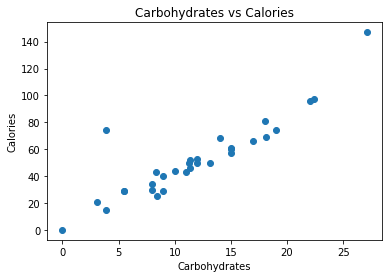

In [4]:
# There is clearly a linear relationship with calories and carbohydrates.
# The outliers are tomato (3.9,74) and durian (27.1,147).
x = fruitdf.carbohydrates
y = fruitdf.calories
plt.scatter(x,y)
plt.title('Carbohydrates vs Calories')
plt.xlabel('Carbohydrates')
plt.ylabel('Calories')
plt.show()

In [ ]:
# Looks like the tomato calories is inaccurate, Source: https://www.healthline.com/nutrition/tomato-nutrition, calories is 18
# Durian calories is accurately proportioned so I'm not changing it, Source: https://www.healthline.com/nutrition/durian-nutrition
# Also, Umba has no data so I'm removing it.
fruitdf.calories[28] = 18
fruitdf.drop(axis=0, index=29, inplace=True)
fruitdf


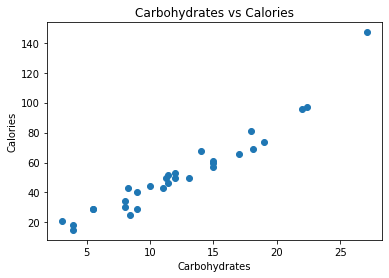

In [10]:
# Scatterplot after the edits
x = fruitdf.carbohydrates
y = fruitdf.calories
plt.scatter(x,y)
plt.title('Carbohydrates vs Calories')
plt.xlabel('Carbohydrates')
plt.ylabel('Calories')
plt.show()

In [76]:
# Now, I'm going to check if the residuals are independent.
# Creating a line of best fit to calculate residuals.
a, b = np.polyfit(x,y,1)
predicted = np.array([a*i+b for i in x])
actual = np.array(y)
residuals = actual - predicted
residuals



array([  3.2882937 ,   0.40969746,  -0.93662361,   2.20714291,
         7.13046466,  -1.4414186 ,  26.86082184,  -9.2880621 ,
         1.65762241, -10.19349365,  10.04931386,   7.4595404 ,
        -4.0899801 ,  -8.79285709, -10.06314479,   1.74324575,
        -8.1890211 ,  -5.0899801 ,   0.75666341,   8.39180726,
        -3.8918981 ,  -1.75643181,  -8.0899801 ,   2.2614584 ,
        -6.53688156,  -2.7117063 ,   1.5585814 ,   7.13046466,
         3.40969746,  -3.24333659])

<AxesSubplot:xlabel='carbohydrates', ylabel='calories'>

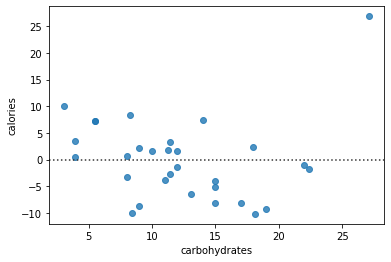

In [77]:
# At first glance, the residuals seem independent.
sns.residplot(x=x,y=y)

In [78]:
# Correlation coefficient of 0.28 is pretty low. Residuals are weakly correlated with calories.
np.corrcoef(residuals,y)

array([[1.       , 0.2778719],
       [0.2778719, 1.       ]])

In [79]:
# https://www.statology.org/durbin-watson-test-python/
# Another way to check if the residuals are independent is to use the Durbin-Watson test. 
# If the value is between 1.5 and 2.5, 'autocorrelation is not problematic'.
from statsmodels.stats.stattools import durbin_watson
durbin_watson(residuals)

2.271905629069354

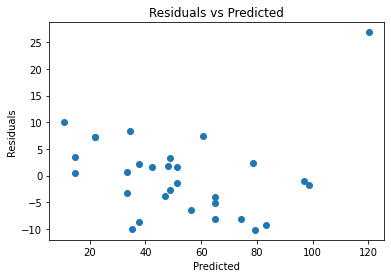

In [80]:
# Testing Homoscadasticity, residuals have constant variance.
# To test this, I'm going to plot the residuals against predicted values and look at the shape.
plt.scatter(predicted,residuals)
plt.title('Residuals vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.show()

# Besides the outlier, the residuals mostly range from -10 to 10 regardless of the predicted value, looks homosecadastic.

In [89]:
# Testing Normality, the residuals follow a normal distribution.
import statsmodels.api as sm
from scipy.stats import norm, normaltest, shapiro
import pylab


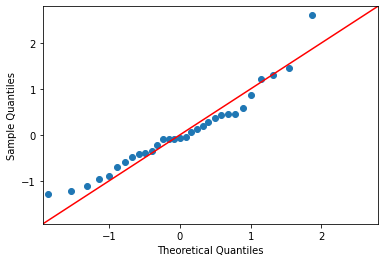

In [82]:
# Quantile-quantile plot, if the points roughly form a straight line, then the residuals are very likely normally distributed.
normresiduals = residuals
normresiduals = norm.rvs(size=31)
sm.qqplot(normresiduals, line='45')
pylab.show()
# Does not look like a straight line

In [84]:
# Test for normality, pvalue represents the probability that the residuals are normally distributed.
# Since pvalue is very low, the residuals seem to not be normally distributed.
normaltest(residuals)

NormaltestResult(statistic=15.834433815457396, pvalue=0.0003644151173928267)

In [103]:
# I'm going to try to run these normal tests with the durian outlier.
nodurianresids = residuals
nodurianresids = np.delete(nodurianresids,6)
nodurianresids

array([  3.2882937 ,   0.40969746,  -0.93662361,   2.20714291,
         7.13046466,  -1.4414186 ,  -9.2880621 ,   1.65762241,
       -10.19349365,  10.04931386,   7.4595404 ,  -4.0899801 ,
        -8.79285709, -10.06314479,   1.74324575,  -8.1890211 ,
        -5.0899801 ,   0.75666341,   8.39180726,  -3.8918981 ,
        -1.75643181,  -8.0899801 ,   2.2614584 ,  -6.53688156,
        -2.7117063 ,   1.5585814 ,   7.13046466,   3.40969746,
        -3.24333659])

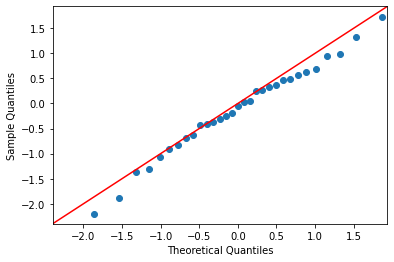

In [104]:
normnodurian = nodurianresids
normnodurian = norm.rvs(size=31)
sm.qqplot(normnodurian, line='45')
pylab.show()
# Not really a straight line

In [105]:
# High pvalue, the residuals can be assumed to be normally distributed without the outlier.
normaltest(nodurianresids)

NormaltestResult(statistic=1.9543969240471626, pvalue=0.3763640213603355)